In [117]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# graphviz 나무구조 시각화
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
import os
%matplotlib inline

In [2]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False

In [3]:
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

# 의사결정나무

    콘크리트 강도를 예측하는 의사결정나무 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라.
    데이터 : Concrete.csv

### Step1. 데이터 가져오기

In [4]:
conc = pd.read_csv("data/BigData/Concrete.csv")
conc.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
CEMENT                           1030 non-null float64
BLAST_FURNACE_SLAG               1030 non-null float64
FLY_ASH                          1030 non-null float64
WATER                            1030 non-null float64
SUPERPLASTICIZER                 1030 non-null float64
COARSE_AGGREGATE                 1030 non-null float64
FINE_AGGREGATE                   1030 non-null float64
AGE                              1030 non-null int64
CONCRETE_COMPRESSIVE_STRENGTH    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
conc.describe()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
conc.columns

Index(['CEMENT', 'BLAST_FURNACE_SLAG', 'FLY_ASH', 'WATER', 'SUPERPLASTICIZER',
       'COARSE_AGGREGATE', 'FINE_AGGREGATE', 'AGE',
       'CONCRETE_COMPRESSIVE_STRENGTH'],
      dtype='object')

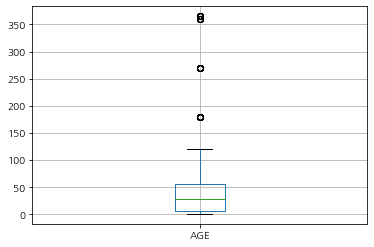

In [25]:
conc.boxplot("AGE")

#### 목표변수와 설명변수를 분리한다.

In [17]:
conc_x=conc.drop( 'CONCRETE_COMPRESSIVE_STRENGTH', axis=1)
conc_y=conc['CONCRETE_COMPRESSIVE_STRENGTH']

### Step2. Train, Validation, Test 데이터 4:3:3 비율로 나누기

In [24]:
# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
temp_x, conc_test_x, temp_y, conc_test_y = train_test_split(conc_x,conc_y, test_size=0.3,
                                                               random_state=1234)
conc_train_x, conc_vali_x, conc_train_y, conc_vali_y = train_test_split(temp_x, temp_y, test_size=3/7, random_state=1234)
print("train data X size :{}".format(conc_train_x.shape))
print("train data Y size :{}".format(conc_train_y.shape))
print("validation data X size :{}".format(conc_vali_x.shape))
print("validation data Y size :{}".format(conc_vali_y.shape))
print("test data X size :{}".format(conc_test_x.shape))
print("test data Y size :{}".format(conc_test_y.shape))

train data X size :(412, 8)
train data Y size :(412,)
validation data X size :(309, 8)
validation data Y size :(309,)
test data X size :(309, 8)
test data Y size :(309,)


원본 데이터의 설명력 확인하기

In [27]:
tree_uncustomize = DecisionTreeRegressor(random_state=1234)
tree_uncustomize.fit(conc_train_x, conc_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(tree_uncustomize.score(conc_train_x,conc_train_y)))

# Validation 데이터 설명력
print("Score on Validation set : {:.3f}".format(tree_uncustomize.score(conc_vali_x,conc_vali_y)))


Score on training set : 1.000
Score on Validation set : 0.689


원본 데이터 설명력 확인 결과 training set에 overfitting된 것을 확인 할 수 있다.

### Step3-1. 최소 자료수 정하기

In [29]:
train_score =[]; valid_score=[]

para_leaf= [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    # 각 최소 자료수에 대해 train과 valid의 설명력을 저장함
    tree=DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(conc_train_x, conc_train_y)
    train_score.append(tree.score(conc_train_x, conc_train_y))
    valid_score.append(tree.score(conc_vali_x, conc_vali_y))
    
# 결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['ValidScore']=valid_score
df_score_leaf['sub']=abs(df_score_leaf['TrainScore']-df_score_leaf['ValidScore'])

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidScore,sub
0,1,1.000,0.689,0.311
1,2,0.984,0.688,0.296
2,3,0.962,0.688,0.274
3,4,0.948,0.718,0.230
4,5,0.918,0.681,0.237
5,6,0.908,0.678,0.230
6,7,0.889,0.679,0.210
7,8,0.876,0.671,0.205
8,9,0.862,0.659,0.203
9,10,0.857,0.663,0.194


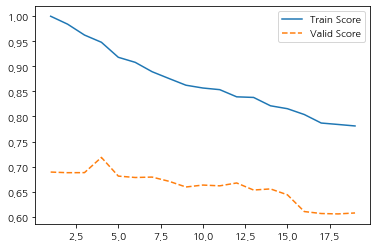

In [30]:

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-",label="Train Score")
plt.plot(para_leaf, valid_score, linestyle="--", label="Valid Score")
plt.legend()

TrainScore와 ValidScore가 충분히 크고 그 둘의 차이가 작은 12를 min leaf의 값으로 선택하겠다.

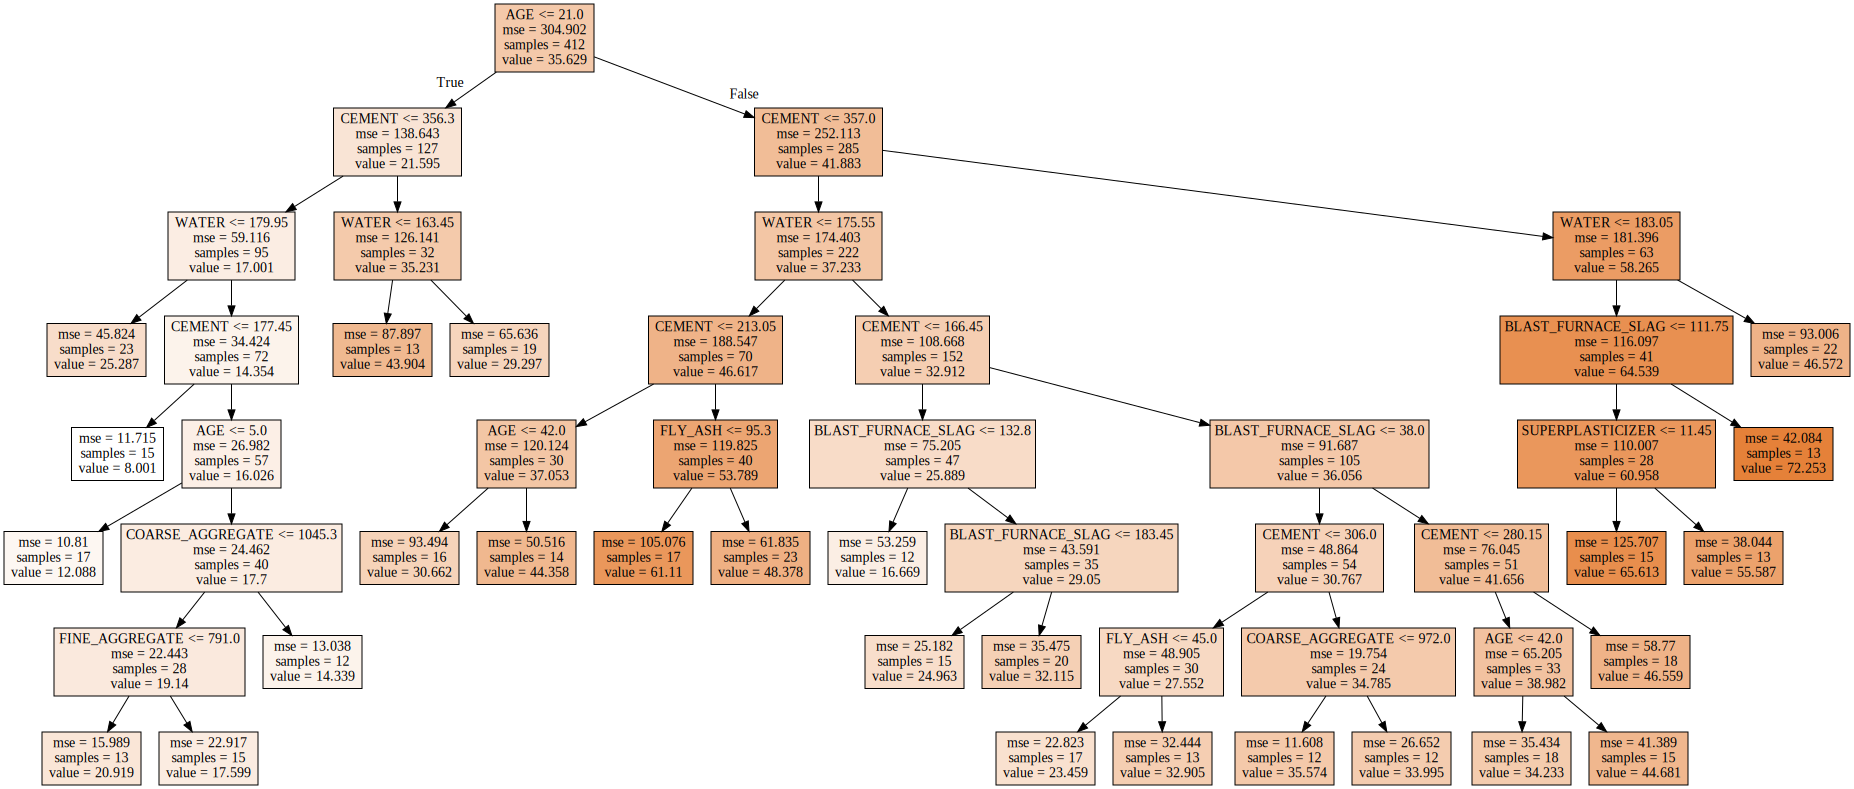

In [32]:
# 변수명 저장
v_feature_name=conc_train_x.columns

# 노드의 최소 자료수 =12 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=12)
tree_graph.fit(conc_train_x, conc_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity=True, filled=True )
with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### Step3-2) 최소 분기수 찾기

In [34]:
train_score=[]; valid_score=[]

para_split=[n_split*2 for n_split in range(10,15)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=12, min_samples_split=v_min_samples_split)
    tree.fit(conc_train_x, conc_train_y)
    train_score.append(tree.score(conc_train_x, conc_train_y))
    valid_score.append(tree.score(conc_vali_x, conc_vali_y))
    
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['ValidScore']=valid_score
df_score_split['sub']=abs(df_score_split['TrainScore']- df_score_split['ValidScore'])

df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidScore,sub
0,20,0.839,0.667,0.172
1,22,0.839,0.667,0.172
2,24,0.839,0.667,0.172
3,26,0.839,0.667,0.172
4,28,0.839,0.667,0.172


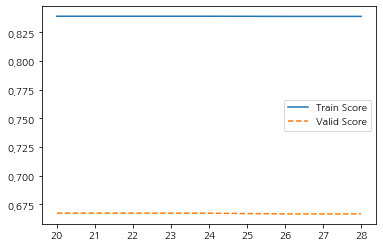

In [35]:
plt.plot(para_split, train_score,linestyle="-", label ="Train Score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid Score")
plt.legend()

위의 방법에서 score의 변곡점이 발견되지 않았기 때문에 범위를 다르게 지정하여 다시 분기수를 찾아보겠다

In [40]:
train_score=[]; valid_score=[]

para_split=[n_split*2 for n_split in range(15,40)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=12, min_samples_split=v_min_samples_split)
    tree.fit(conc_train_x, conc_train_y)
    train_score.append(tree.score(conc_train_x, conc_train_y))
    valid_score.append(tree.score(conc_vali_x, conc_vali_y))
    
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['ValidScore']=valid_score
df_score_split['sub']=abs(df_score_split['TrainScore']- df_score_split['ValidScore'])

df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidScore,sub
0,30,0.833,0.666,0.167
1,32,0.816,0.629,0.187
2,34,0.796,0.625,0.171
3,36,0.793,0.622,0.171
4,38,0.793,0.622,0.171
5,40,0.793,0.622,0.171
6,42,0.770,0.618,0.152
7,44,0.770,0.618,0.152
8,46,0.770,0.618,0.152
9,48,0.759,0.610,0.149


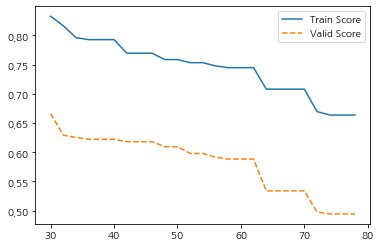

In [41]:
plt.plot(para_split, train_score,linestyle="-", label ="Train Score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid Score")
plt.legend()

    split이 30을 넘어가는 순간 train과 valid의 score모두 떨어지는 모습을 확인할 수 있었다.
    따라서, 이번 과제에서는 split을 30으로 지정하겠다.

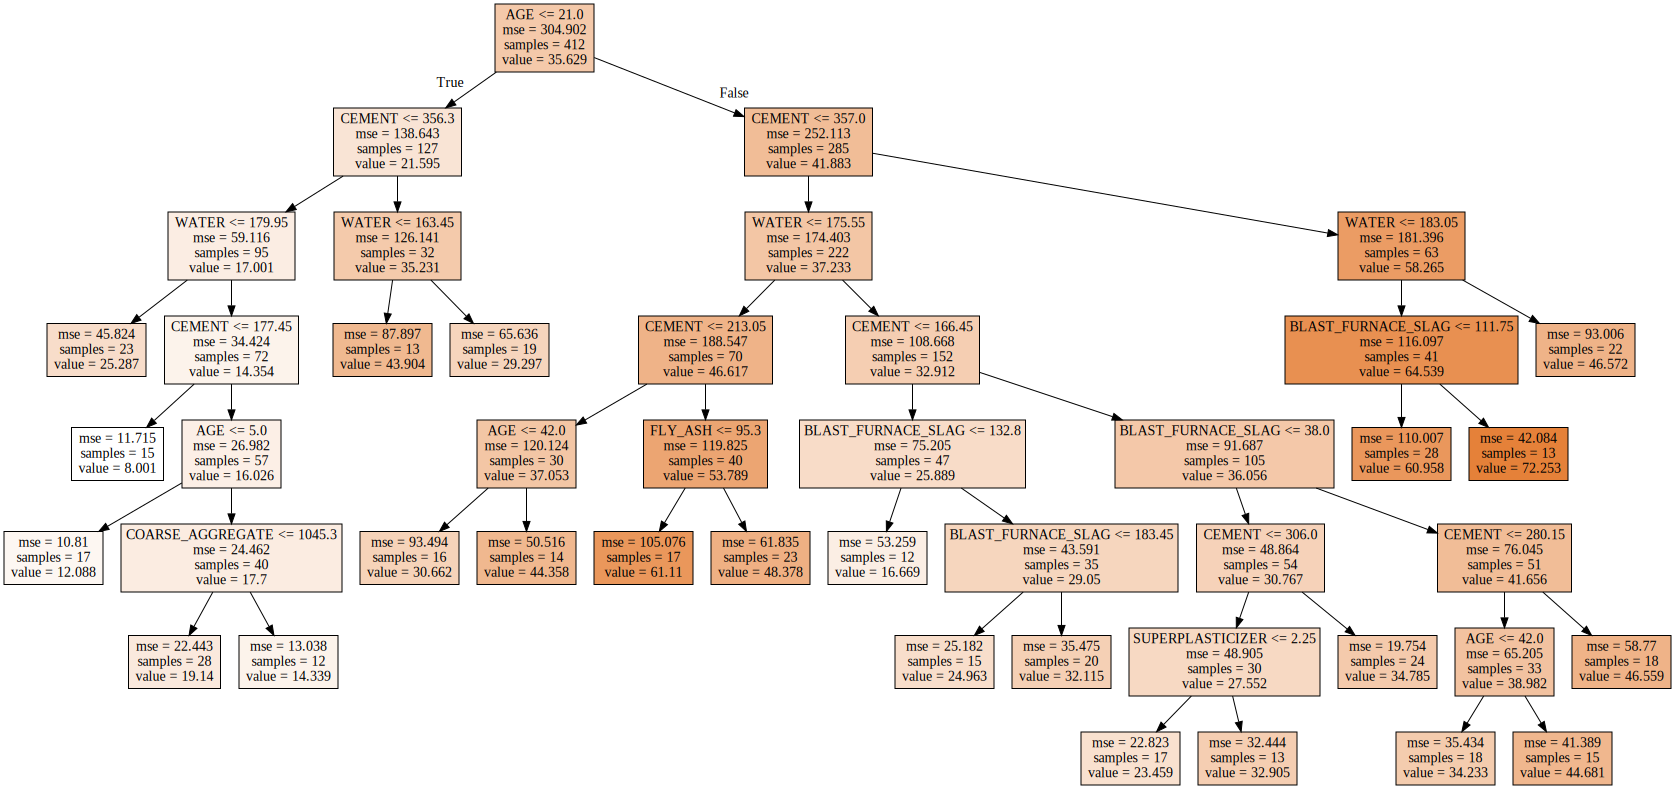

In [42]:
tree_graph=DecisionTreeRegressor(random_state=1234, min_samples_leaf = 12, min_samples_split=30)
tree_graph.fit(conc_train_x, conc_train_y)

export_graphviz(tree_graph, out_file="tree_split.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### Step3-3) 최대 깊이값 정하기

In [43]:
train_score=[]; valid_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    
    tree=DecisionTreeRegressor(random_state=1234, min_samples_leaf=12, min_samples_split=30, max_depth=v_max_depth)
    tree.fit(conc_train_x, conc_train_y)
    train_score.append(tree.score(conc_train_x, conc_train_y))
    valid_score.append(tree.score(conc_vali_x, conc_vali_y))
    

# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['MinSamplesSplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['ValidScore']=valid_score
df_score_depth['sub']=abs(df_score_depth['TrainScore']- df_score_depth['ValidScore'])

df_score_depth.round(3)

,MinSamplesSplit,TrainScore,ValidScore,sub
0,1,0.288,0.190,0.098
1,2,0.524,0.400,0.124
2,3,0.662,0.482,0.180
3,4,0.742,0.565,0.177
4,5,0.805,0.612,0.192
5,6,0.820,0.638,0.183
6,7,0.833,0.666,0.167
7,8,0.833,0.666,0.167
8,9,0.833,0.666,0.167
9,10,0.833,0.666,0.167


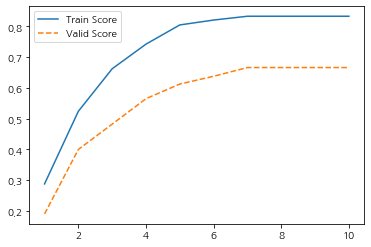

In [44]:
plt.plot(para_depth, train_score, linestyle="-", label ="Train Score")
plt.plot(para_depth, valid_score, linestyle="--", label="Valid Score")
plt.legend()

depth는 valid와 train의 score값의 변동이 더이상 없는 7로 선택하겠다.

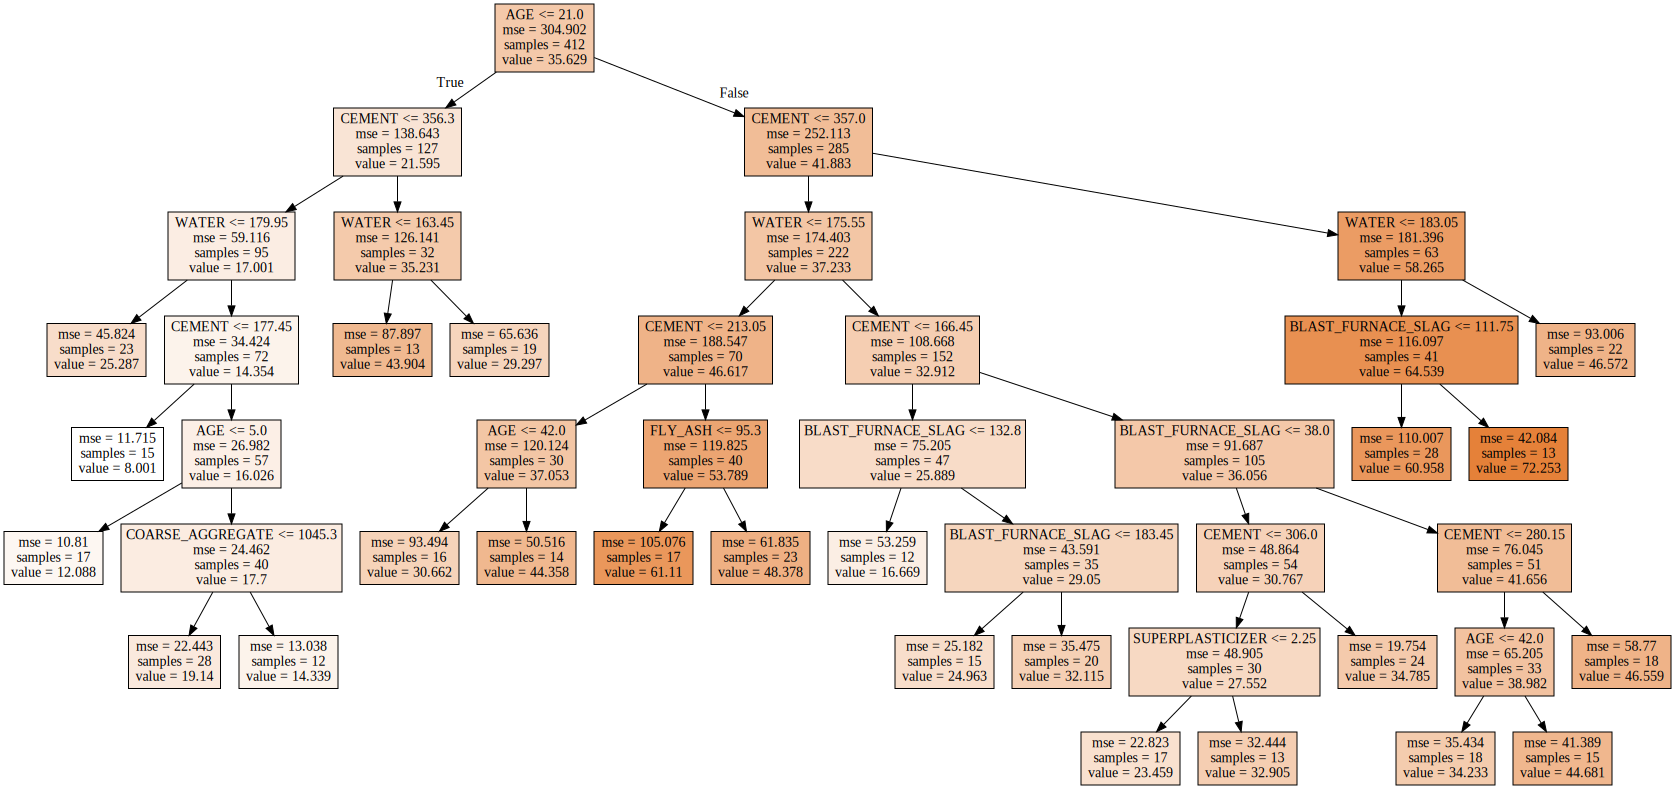

In [45]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=12,
                                  min_samples_split=30, max_depth=7)

tree_graph.fit(conc_train_x, conc_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot", feature_names=v_feature_name, impurity=True,
                filled=True)

with open("tree_depth.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### Step4) 최종 모델 선정

min_samples_leaf=**12** min_samples_split=**30** max_depth=**7**

In [46]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 12, min_samples_split=30, max_depth=7,
                                  random_state=1234)
tree_final.fit(conc_train_x,conc_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=12,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

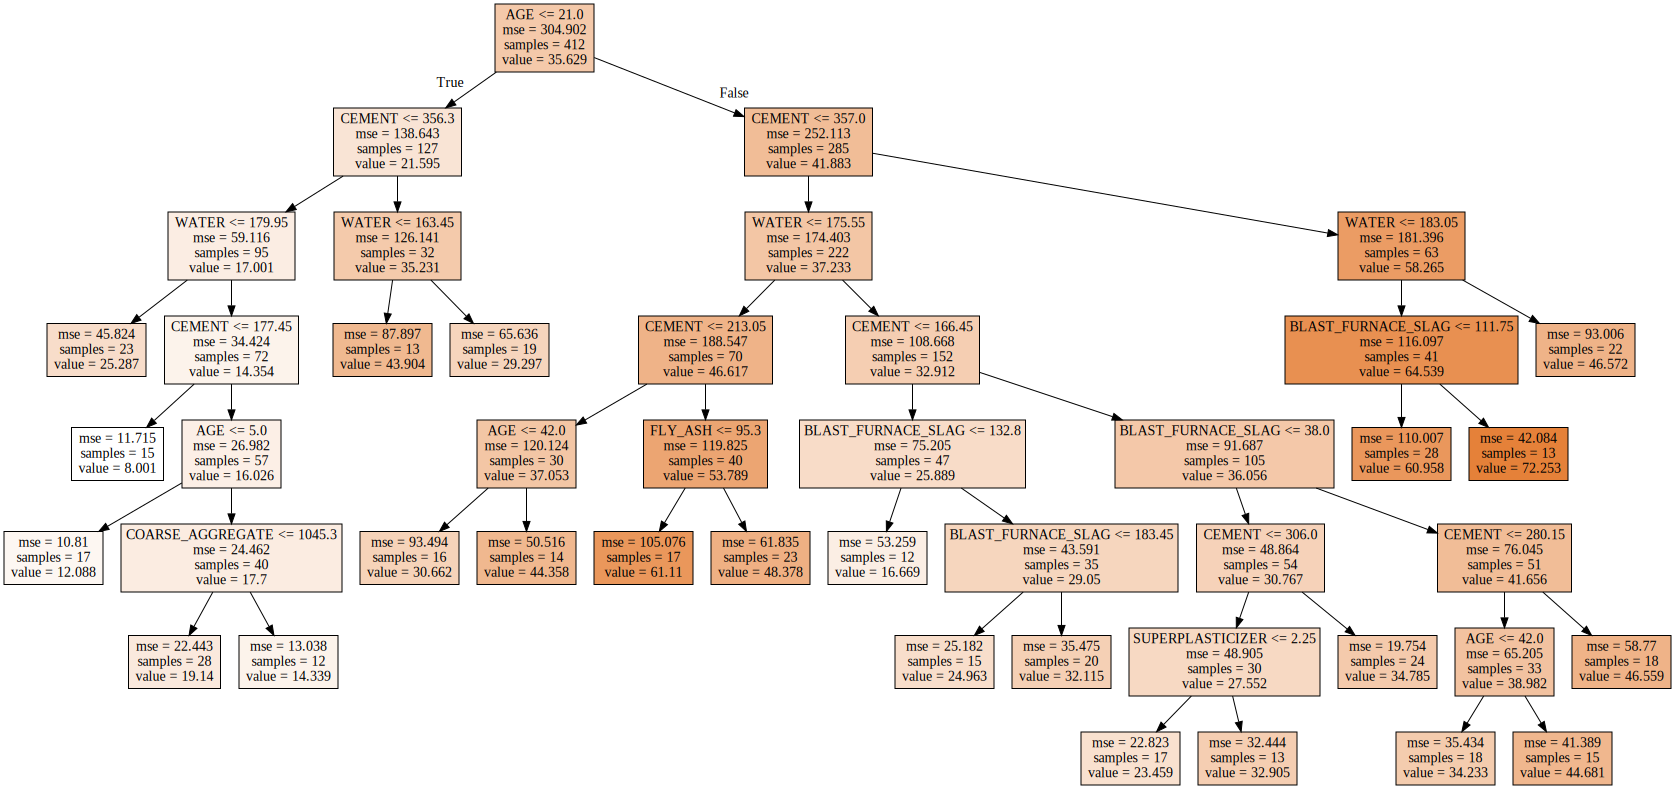

In [47]:
export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [48]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
0,CEMENT,0.382
7,AGE,0.371
3,WATER,0.166
1,BLAST_FURNACE_SLAG,0.058
2,FLY_ASH,0.015
4,SUPERPLASTICIZER,0.006
5,COARSE_AGGREGATE,0.002
6,FINE_AGGREGATE,0.000


Text(0, 0.5, '변수')

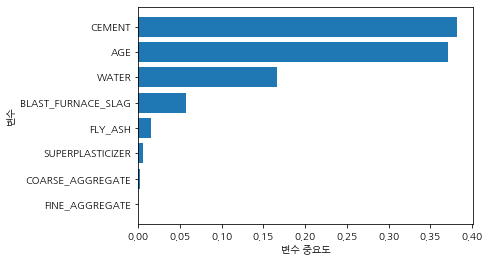

In [49]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel('변수')

### Step5) 결과확인

변수 중요도를 확인해본 결과 Cement와 age의 값이 CONCRETE_COMPRESSIVE_STRENGTH에 영향을 주고 있다는 것을 확인 할 수 있었다.

**최종 모델에 대한 scores**

In [51]:
print("Score on training set : {:.3f}".format(tree_final.score(conc_train_x, conc_train_y)))
print("Score on validation set : {:.3f}".format(tree_final.score(conc_vali_x, conc_vali_y)))
print("Score on test set : {:.3f}".format(tree_final.score(conc_test_x, conc_test_y)))

Score on training set : 0.833
Score on validation set : 0.666
Score on test set : 0.704


**Customized Decision Tree's MSE/MAE**

In [56]:
print("MSE : ",mean_squared_error(conc_test_y, tree_final.predict(conc_test_x)))
print("MAE : ", mean_absolute_error(conc_test_y, tree_final.predict(conc_test_x)))

MSE :  77.114538086082
MAE :  6.946361345378279


**GridSearchCV로 모델 생성하기**

In [97]:
estimator = DecisionTreeRegressor()

param_grid={"criterion":["mse",'friedman_mse','mae'],'max_features':['auto','sqrt','log2'],
           'max_depth':para_depth, 'min_samples_split':para_split,
           "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator, param_grid, scoring="r2",n_jobs=-1) # n_jobs =-1 : 사용되는 코어 개수
grid_dt.fit(conc_train_x, conc_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

best parameter : 
{'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 20}

best score:
0.722


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [98]:
print("Score on test set with gridsearchCV model : {:.3f}".format(grid_dt.score(conc_test_x, conc_test_y)))

Score on test set with gridsearchCV model : 0.708


**Best Estimator Model's MSE/MAE**

In [99]:
print("MSE : ",mean_squared_error(conc_test_y, grid_dt.predict(conc_test_x)))
print("MAE : ", mean_absolute_error(conc_test_y, grid_dt.predict(conc_test_x)))

MSE :  73.83425665925367
MAE :  6.2724740291408665


# Step 6) 결론

### 아쉽지만, best estimator model보다 정확도가 떨어진다.
### 하지만 컴퓨터가 찾아낸 최적의 조합으로 이뤄진 모델과 견주어보았을 때 많이 뒤쳐지지 않는 듯 하다.

# 랜덤 포레스트

    콘크리트 강도를 예측하는 랜덤 포레스트 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라
    데이터 : Concrete.csv

### Step 1) 데이터셋 가져오기

In [57]:
conc = pd.read_csv("data/BigData/Concrete.csv")
conc.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [58]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
CEMENT                           1030 non-null float64
BLAST_FURNACE_SLAG               1030 non-null float64
FLY_ASH                          1030 non-null float64
WATER                            1030 non-null float64
SUPERPLASTICIZER                 1030 non-null float64
COARSE_AGGREGATE                 1030 non-null float64
FINE_AGGREGATE                   1030 non-null float64
AGE                              1030 non-null int64
CONCRETE_COMPRESSIVE_STRENGTH    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [59]:
conc.describe()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [60]:
conc.columns

Index(['CEMENT', 'BLAST_FURNACE_SLAG', 'FLY_ASH', 'WATER', 'SUPERPLASTICIZER',
       'COARSE_AGGREGATE', 'FINE_AGGREGATE', 'AGE',
       'CONCRETE_COMPRESSIVE_STRENGTH'],
      dtype='object')

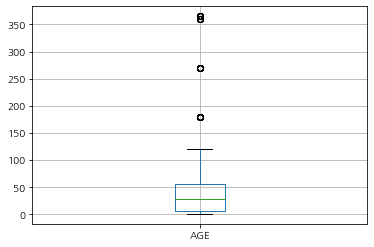

In [61]:
conc.boxplot("AGE")

목표변수와 설명변수를 분리한다.

In [62]:
conc_x=conc.drop( 'CONCRETE_COMPRESSIVE_STRENGTH', axis=1)
conc_y=conc['CONCRETE_COMPRESSIVE_STRENGTH']

### Step2. Train, Validation, Test 데이터 4:3:3 비율로 나누기

In [64]:
# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
temp_x, conc_test_x, temp_y, conc_test_y = train_test_split(conc_x,conc_y, test_size=0.3,
                                                               random_state=12)
conc_train_x, conc_vali_x, conc_train_y, conc_vali_y = train_test_split(temp_x, temp_y, test_size=3/7, random_state=1234)
print("train data X size :{}".format(conc_train_x.shape))
print("train data Y size :{}".format(conc_train_y.shape))
print("validation data X size :{}".format(conc_vali_x.shape))
print("validation data Y size :{}".format(conc_vali_y.shape))
print("test data X size :{}".format(conc_test_x.shape))
print("test data Y size :{}".format(conc_test_y.shape))

train data X size :(412, 8)
train data Y size :(412,)
validation data X size :(309, 8)
validation data Y size :(309,)
test data X size :(309, 8)
test data Y size :(309,)


원본 데이터의 설명력 확인하기

In [65]:
tree_uncustomize = DecisionTreeRegressor(random_state=12)
tree_uncustomize.fit(conc_train_x, conc_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(tree_uncustomize.score(conc_train_x,conc_train_y)))

# Validation 데이터 설명력
print("Score on Validation set : {:.3f}".format(tree_uncustomize.score(conc_vali_x,conc_vali_y)))


Score on training set : 1.000
Score on Validation set : 0.815


원본 데이터 설명력 확인 결과 training set에 overfitting된 것을 확인 할 수 있다.

### Step 2) 최적 트리수 찾기

In [72]:
train_score=[]; valid_score=[]

para_n_tree=[n_tree*10 for  n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state=12)
    rf.fit(conc_train_x, conc_train_y)
    train_score.append(rf.score(conc_train_x,conc_train_y))
    valid_score.append(rf.score(conc_vali_x, conc_vali_y))

    
df_score_n = pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['ValidScore']=valid_score
df_score_n['sub']=abs(df_score_n['TrainScore']-df_score_n['ValidScore'])

df_score_n.sort_values("sub", ascending=True, inplace=True) # 차이 컬럼을 생성해서 값 비교

df_score_n.round(3)

,n_estimators,TrainScore,ValidScore,sub
1,20,0.981,0.877,0.104
4,50,0.983,0.876,0.107
0,10,0.977,0.869,0.107
5,60,0.983,0.876,0.108
6,70,0.983,0.875,0.109
3,40,0.982,0.872,0.110
2,30,0.982,0.872,0.111
7,80,0.983,0.872,0.111
8,90,0.983,0.872,0.111
9,100,0.983,0.872,0.111


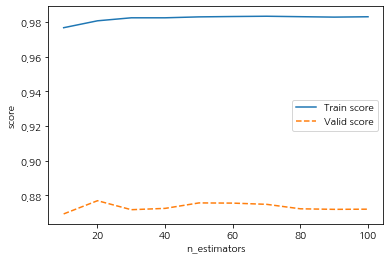

In [73]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train score")
plt.plot(para_n_tree, valid_score, linestyle="--", label="Valid score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

**Tree 의 개수 판단::**
위 그래프와 표로 보아 트리의 개수가 20일때 train과 valid에 대한 score가 뛰어나고, 그 둘의 차이도 적은 편이라 판단되므로 이번 과제에서는 트리를 20개로 선택하겠다.

### Step 3-1) 최적 leaf 수 찾기

In [81]:
train_score=[]; valid_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=12, n_estimators=20, min_samples_leaf =v_min_samples_leaf)
    rf.fit(conc_train_x, conc_train_y)
    train_score.append(rf.score(conc_train_x, conc_train_y))
    valid_score.append(rf.score(conc_vali_x, conc_vali_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=valid_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.981,0.877
1,2,0.966,0.869
2,3,0.952,0.857
3,4,0.935,0.843
4,5,0.923,0.834
5,6,0.911,0.834
6,7,0.900,0.825
7,8,0.889,0.817
8,9,0.878,0.804
9,10,0.869,0.793


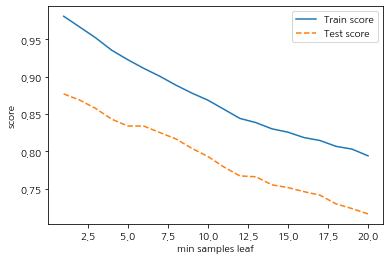

In [82]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train score")
plt.plot(para_leaf, valid_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

leaf의 경우 너무 작은 값을 갖게되면 overfitting이 될 여지가 있기 때문에 데이터의 총량(1000개 이상)을 고려해 적당히 큰 20을 선택하겠다.


### Step 3-2) 최적 분기수 찾기

In [85]:
train_score=[]; valid_score=[]

para_split = [n_split*2 for n_split in range(10,100,5)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=12, n_estimators=20, min_samples_leaf = 20, 
                            min_samples_split=v_min_samples_split)
    rf.fit(conc_train_x, conc_train_y)
    train_score.append(rf.score(conc_train_x, conc_train_y))
    valid_score.append(rf.score(conc_vali_x, conc_vali_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf']=para_split
df_score_split['TrainScore']=train_score
df_score_split['ValidScore']=valid_score
df_score_split['sub']=abs(df_score_split['TrainScore']-df_score_split['ValidScore'])

df_score_split.round(3)

,MinSamplesLeaf,TrainScore,ValidScore,sub
0,20,0.794,0.716,0.078
1,30,0.794,0.716,0.078
2,40,0.794,0.716,0.078
3,50,0.782,0.709,0.074
4,60,0.765,0.694,0.071
5,70,0.745,0.675,0.070
6,80,0.717,0.649,0.068
7,90,0.674,0.615,0.059
8,100,0.648,0.589,0.058
9,110,0.630,0.571,0.059


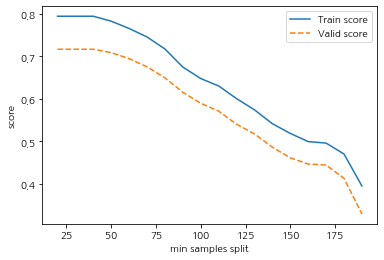

In [86]:
plt.plot(para_split, train_score, linestyle="-", label="Train score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

최적 분기의 개수는 위 그래프의 변곡점과 동일한 값을 갖는30을 선택하도록 하겠다.

### Step3-3) 최대 깊이값 정하기

In [89]:
train_score=[]; valid_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=12, n_estimators=20,
                             min_samples_leaf=20, min_samples_split=30, max_depth=v_max_depth)
    rf.fit(conc_train_x, conc_train_y)
    train_score.append(rf.score(conc_train_x, conc_train_y))
    valid_score.append(rf.score(conc_vali_x,conc_vali_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['ValidScore']=valid_score
df_score_depth['sub']=abs(df_score_depth['TrainScore']-df_score_depth['ValidScore'])
df_score_depth.round(3)

,Depth,TrainScore,ValidScore,sub
0,1,0.395,0.329,0.066
1,2,0.637,0.567,0.070
2,3,0.747,0.676,0.072
3,4,0.787,0.713,0.074
4,5,0.794,0.716,0.077
5,6,0.794,0.716,0.078
6,7,0.794,0.716,0.078
7,8,0.794,0.716,0.078
8,9,0.794,0.716,0.078
9,10,0.794,0.716,0.078


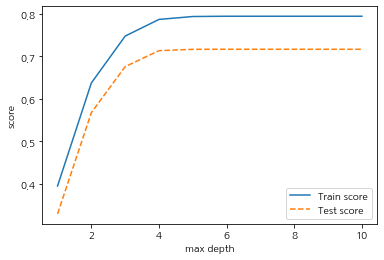

In [90]:
plt.plot(para_depth, train_score, linestyle="-", label="Train score")
plt.plot(para_depth, valid_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

깊이가 4이상일때 부터 score의 값이 동일하게 나오므로, 4를 선택하겠다.

### Step 4) 최종 모델 선택

In [91]:
rf_final = RandomForestRegressor(random_state=12, n_estimators=20, min_samples_leaf=20,
                                 min_samples_split=30, max_depth=4)
rf_final.fit(conc_train_x, conc_train_y)

print("Score on training set :{:.3f}".format(rf_final.score(conc_train_x, conc_train_y)))
print("Score on validation set : {:.3f}".format(rf_final.score(conc_vali_x, conc_vali_y)))
print("Score on test set : {:.3f}".format(rf_final.score(conc_test_x, conc_test_y)))

Score on training set :0.787
Score on validation set : 0.713
Score on test set : 0.708


In [92]:
v_feature_name = conc_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.405
0,CEMENT,0.358
4,SUPERPLASTICIZER,0.101
3,WATER,0.085
1,BLAST_FURNACE_SLAG,0.032
6,FINE_AGGREGATE,0.019
5,COARSE_AGGREGATE,0.000
2,FLY_ASH,0.000


Text(0, 0.5, '변수')

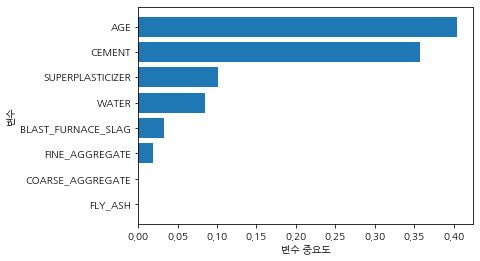

In [93]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

변수 중요도 그래프를 보면 중요도의 차이는 존재하지만 decision tree모델과 마찬가지로, age와 cement가 많은 영향을 끼친다는 것을 확인할 수 있었다.

### Step 5) 결과확인

**Customized Decision Tree's MSE/MAE**

In [145]:
print("MSE : ",mean_squared_error(conc_test_y, rf_final.predict(conc_test_x)))
print("MAE : ", mean_absolute_error(conc_test_y, rf_final.predict(conc_test_x)))

MSE :  35.54253631466608
MAE :  4.397113777903758


**GridSearchCV로 모델 생성하기**

In [102]:
estimator = RandomForestRegressor(random_state=12)

param_grid={"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator, param_grid, scoring ="r2", n_jobs=-1)
grid_dt.fit(conc_train_x, conc_train_y)

print("best estimator model\n {}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12, verbose=0,
                      warm_start=False)

best parameter : 
{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 20}

best score : 
0.795


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [103]:
print("Score on test set with gridsearchCV model : {:.3f}".format(grid_dt.score(conc_test_x, conc_test_y)))

Score on test set with gridsearchCV model : 0.810


**Best Estimator Model's MSE/MAE**

In [104]:
print("MSE : ",mean_squared_error(conc_test_y, grid_dt.predict(conc_test_x)))
print("MAE : ", mean_absolute_error(conc_test_y, grid_dt.predict(conc_test_x)))

MSE :  47.965798019238434
MAE :  5.410453843785237


# Step 6) 결론

### best estimator model가 정확도가 떨어진다.
### 하지만 Decision Tree의 결론과 마친가지로 MSE 와 MAE가 많이 차이나지만, MSE경우 잔차를 제곱해서 더하기 때문에 오차에 대한 "패널티"가 존재하는 것과 동일하기 때문에 단순히 오차 정도로만 계산된 MAE의 값으로 비교해 본다면 직접 구성한 모델의 정확도가 많이 뒤쳐지는 것은 아니라는 결론을 내릴 수 있다.


    * Decision Tree와 RandomForest 알고리즘을 GridSearchCV의 결과로 비교해본다면 Randomforest의 best-score가 0.795, Decision Tree의 best-score가 0.722로 근소한 차이지만 RandomForest의 결과가 더 좋은 것을 알 수 있었습니다.
    
    * 직접 커스텀한 모델과 GridSearchCV가 생성한 모델의 score차이 발생원인에 대해 생각을 해 보았습니다.
    커스텀한 모델의 경우 validation data까지 고려해 계수들을 결정지어 나간 반면, GridSearchCV는 동일하게 train data를 가지고 모델을 학습 시켰지만 validation을 하는 데이터를 사용해주지 않아 새로운 값이 들어왔을 때의 예측 성공률이 떨어지는 것 같습니다.